In [9]:
import requests

# url = "https://paper-api.alpaca.markets/v2/rebalancing/portfolios"
url = "https://paper-api.alpaca.markets/v2/account"
# url = "https://broker-api.sandbox.alpaca.markets/v1/rebalancing/portfolios"

payload = {
    "name": "my-portfolio",
    "weights": [
        {
            "type": "cash",
            "symbol": "AAPL",
            "percent": "60"
        },
        {
            "type": "cash",
            "symbol": "MSFT",
            "percent": "40"
        }
    ]
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "APCA-API-KEY-ID": "PKY1BGY47OM4SXW2QLLF",
    "APCA-API-SECRET-KEY": "oLgofehOZTq5bSoH0QGJyvRlVJkw9ubaXiUIS3C4"
}

response = requests.post(url, json=payload, headers=headers)
# response = requests.get(url, headers=headers)

print(response.text)

{"id":"5df531f7-95af-4cf4-8229-f51d84798034","admin_configurations":{},"user_configurations":null,"account_number":"PA2FYD4CBG58","status":"ACTIVE","crypto_status":"ACTIVE","currency":"USD","buying_power":"200000","regt_buying_power":"200000","daytrading_buying_power":"0","effective_buying_power":"200000","non_marginable_buying_power":"98000","bod_dtbp":"0","cash":"100000","accrued_fees":"0","pending_transfer_in":"0","portfolio_value":"100000","pattern_day_trader":true,"trading_blocked":false,"transfers_blocked":false,"account_blocked":false,"created_at":"2020-08-03T20:29:59.404525Z","trade_suspended_by_user":false,"multiplier":"2","shorting_enabled":true,"equity":"100000","last_equity":"100000","long_market_value":"0","short_market_value":"0","position_market_value":"0","initial_margin":"0","maintenance_margin":"0","last_maintenance_margin":"0","sma":"0","daytrade_count":0,"balance_asof":"2024-03-22","crypto_tier":1}


In [16]:
import os
from dotenv import load_dotenv
load_dotenv()
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest, LimitOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce

alpaca_api_key = os.environ.get("APCA-API-KEY-ID")
alpaca_secret_key = os.environ.get("APCA-API-SECRET-KEY")
trading_client = TradingClient(alpaca_api_key, alpaca_secret_key, paper=True)

# preparing market order
market_order_data = MarketOrderRequest(
                    symbol="SPY",
                    qty=1,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.DAY
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )

# preparing limit order
# limit_order_data = LimitOrderRequest(
#                     symbol="SPY",
#                     limit_price=17000,
#                     qty=1,
#                     side=OrderSide.SELL,
#                     time_in_force=TimeInForce.FOK
#                    )

# # Limit order
# limit_order = trading_client.submit_order(
#                 order_data=limit_order_data
#               )

[*********************100%%**********************]  1 of 1 completed


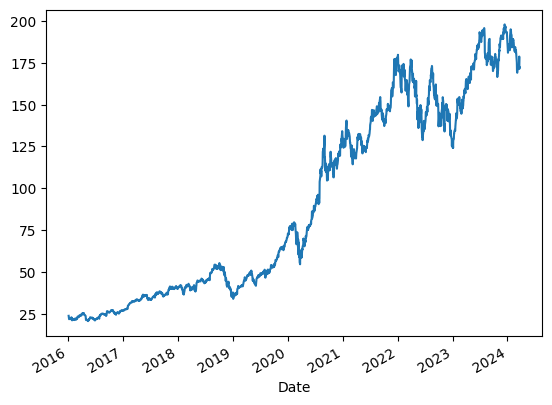

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.946918,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.346821,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.889933,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.923872,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.039803,283192000
...,...,...,...,...,...,...
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100


In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2024-03-24')

# Import the plotting library
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()
data